<a href="https://colab.research.google.com/github/fabnap/Notebooks/blob/main/BAT_tutorial_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://bat.github.io/BAT.jl/stable/assets/logo.svg" height="100" /> _for VIPers_

> TL;DR: _Julia looks and feels a lot like Python, only much faster. It's dynamic, expressive, extensible, with batteries included, in particular for Data Science_. BAT is implemented in Julia (older version in ROOT no longer mantained)

This notebook is an **introduction to BAT** made by Fabrizio Napolitano napolitano.fabrizio@lnf.infn.it

It will go through the most important BAT features.

# The BAT.jl website
https://bat.github.io/BAT.jl/stable/ Provides all the needed information for the installation of the software.

# More readings about Julia
The Julia website https://julialang.org/ provides many links to introductory videos and written tutorials https://julialang.org/learning/ , e.g. "Intro to Julia" https://www.youtube.com/watch?v=fMa1qSg_LxA, Think Julia: How to Think Like a Computer Scientist https://benlauwens.github.io/ThinkJulia.jl/latest/book.html and "The Fast Track to Julia" https://juliadocs.github.io/Julia-Cheat-Sheet/. If you are familar with MATLAB or Python, you may also want to take a look at the "MATLAB–Python–Julia cheatsheet" https://cheatsheets.quantecon.org/.

The in-depth article Why Numba and Cython are not substitutes for Julia explains how Julia addresses several fundamental challenges inherent to scientific high-performance computing. http://www.stochasticlifestyle.com/why-numba-and-cython-are-not-substitutes-for-julia/

For a in-depth introduction using Google Colab notebook see 
https://colab.research.google.com/github/ageron/julia_notebooks/blob/master/Julia_for_Pythonistas.ipynb#scrollTo=6ew60wXrZM0W


# Information on this tutorial
The Google Colab offers live notebook with quite some computing power for free, you just need a google account. For the sake of the tutorial and introduction that will do. However try installing Julia and bat as detailed here.
 https://bat.github.io/BAT.jl/stable/installation/
Installation is easy and fast, get back to me if you do not manage.

Google offers a live Jupyter Notebook https://en.wikipedia.org/wiki/Project_Jupyter if you are not familiar with it, it is a way to program directly on a web browser. The code is executed in *cells*, and each cell can be executed separately and as many time as you want. This is useful if you are prototyping something and need to run only a piece of a bigger code. To execute a cell, press Ctrl+Enter 

Google Colab notebook have hard cut of 12 hours activity: afterwards they will be restarted. Also a notebook which is idle will restart itself. If it does you will need to re-reun all the installation!


# Getting Started with Julia in Colab/Jupyter
You can either run this notebook in Google Colab, or using Jupyter on your own machine.

## Running on Google Colab
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia (the Jupyter kernel for Julia) and other packages. You can update `JULIA_VERSION` and the other parameters, if you know what you're doing. Installation takes 2-3 minutes.
3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the _Checking the Installation_ section.

* _Note_: If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2 and 3.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-09-08 14:29:03 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package PyCall...
Installing Julia package PyPlot...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


## Running This Notebook Locally (Skip this section if using Google instead)
If you prefer to run this notebook on your machine instead of Google Colab:

* Download this notebook (File > Download .ipynb)
* Install [Julia](https://julialang.org/downloads/)
* Run the following command in a terminal to install `IJulia` (the Jupyter kernel for Julia), and a few packages we will use:
```bash
julia -e 'using Pkg
            pkg"add IJulia; precompile;"
            pkg"add BenchmarkTools; precompile;"
            pkg"add PyCall; precompile;"
            pkg"add PyPlot; precompile;"'
```

* Next, go to the directory containing this notebook:

    ```julia
cd /path/to/notebook/directory
```

* Start Jupyter Notebook:

    ```bash
julia -e 'using IJulia; IJulia.notebook()'
```

    Or replace `notebook()` with `jupyterlab()` if you prefer JupyterLab.

    If you do not already have [Jupyter](https://jupyter.org/install) installed, IJulia will propose to install it. If you agree, it will automatically install a private Miniconda (just for Julia), and install Jupyter and Python inside it.

* Lastly, open this notebook and skip directly to the next section.

## Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system (if you ever ask for help or file an issue about Julia, you should always provide this information).

In [1]:
versioninfo()

Julia Version 1.6.0
Commit f9720dc2eb (2021-03-24 12:55 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, haswell)
Environment:
  JULIA_NUM_THREADS = 4


# Getting Help
To get help on any module, function, variable, or just about anything else, just type `?` followed by what you're interested in. For example:

In [ ]:
?versioninfo

This works in interactive mode only: in Jupyter, Colab and in the Julia shell (called the REPL).

Here are a few more ways to get help and inspect objects in interactive mode:

|Julia|Python
|-----|------
|`?obj` | `help(obj)`
|`dump(obj)` | `print(repr(obj))`
|`names(FooModule)` | `dir(foo_module)`
|`methodswith(SomeType)` | `dir(SomeType)`
|`@which func` | `func.__module__`
|`apropos("bar")` | Search for `"bar"` in docstrings of all installed packages
|`typeof(obj)` | `type(obj)`
|`obj isa SomeType`<br />or<br />`isa(obj, SomeType)` | `isinstance(obj, SomeType)`

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

And of course, you can also learn and get help here:

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

# A First Look at Julia
This section will give you an idea of what Julia looks like and what some of its major qualities are: it's expressive, dynamic, flexible, and most of all, super fast.

## Estimating π
Let's write our first function. It will estimate π using the equation:
$π = 4 \times \left(1 - \dfrac{1}{3} + \dfrac{1}{5} - \dfrac{1}{7} + \dfrac{1}{9}-\dfrac{1}{11}+\dots\right)$

There are much better ways to estimate π, but this one is easy to implement.

In [ ]:
function estimate_pi(n)
    s = 1.0
    for i in 1:n
        s += (isodd(i) ? -1 : 1) / (2i + 1)
    end
    4s
end

p = estimate_pi(100_000_000)
println("π ≈ $p")
println("Error is $(p - π)")

Compare this with the equivalent Python 3 code:

```python
# PYTHON
import math

def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s

p = estimate_pi(100_000_000)
print(f"π ≈ {p}") # f-strings are available in Python 3.6+
print(f"Error is {p - math.pi}")
```

Pretty similar, right? But notice the small differences:

|Julia|Python
|-----|------
|`function` | `def`
|`for i in X`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end` | `for i in X:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`1:n` | `range(1, n+1)`
|`cond ? a : b` | `a if cond else b`
|`2i + 1` | `2 * i + 1`
|`4s` | `return 4 * s`
|`println(a, b)` | `print(a, b, sep="")`
|`print(a, b)` | `print(a, b, sep="", end="")`
|`"$p"` | `f"{p}"`
|`"$(p - π)"` | `f"{p - math.pi}"`

This example shows that:
* Julia can be just as concise and readable as Python.
* Indentation in Julia is _not_ meaningful like it is in Python. Instead, blocks end with `end`.
* Many math features are built in Julia and need no imports.
* There's some mathy syntactic sugar, such as `2i` (but you can write `2 * i` if you prefer).
* In Julia, the `return` keyword is optional at the end of a function. The result of the last expression is returned (`4s` in this example).
* Julia loves Unicode and does not hesitate to use Unicode characters like `π`. However, there are generally plain-ASCII equivalents (e.g., `π == pi`).

# Install the needed packages
in Julia, the extra packages are installed as shown below; BAT can be installed with one-liner command.
This will take about 6 minutes.

If you install this locally, you do it once and then forget. In this Google environment it has to be done every time the notebook is reset.

In [2]:
using Pkg
pkg"add BAT ArraysOfArrays Distributions ElasticArrays IntervalSets Parameters Plots ValueShapes StatsBase Tables TypedTables"

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed ElasticArrays ──────────────── v1.2.9
   Installed IntervalSets ───────────────── v0.5.3
   Installed ArraysOfArrays ─────────────── v0.5.4
   Installed ValueShapes ────────────────── v0.8.3
   Installed Parameters ─────────────────── v0.12.2
   Installed Plots ──────────────────────── v1.21.3
   Installed Distributions ──────────────── v0.24.18
   Installed BAT ────────────────────────── v2.0.5
   Installed SortingAlgorithms ──────────── v1.0.1
   Installed ZygoteRules ────────────────── v0.2.1
   Installed Tables ─────────────────────── v1.5.1
   Installed TypedTables ────────────────── v1.4.0
   Installed KernelDensity ──────────────── v0.6.3
   Installed DiffRules ──────────────────── v1.3.0
   Installed InplaceOps ─────────────────── v0.3.0
   Installed HTTP ───────────────────────── v0.9.14
   Installed StatsBase ──────────────────── v0.33.10
   Installed Missings ────────────────

# Enter the tutorial
Ok, so now we have all in place for the actual tutorial. We will simulate a Bayesian analysis of VIP-Like data.

The goal is to calculate the 90% C.I. on number of Signal events in a distribution.

# Generate random Data
So to start we will include some packages; it is the equivalent of python 'import'

In [2]:
using Random, LinearAlgebra, Statistics, Distributions, StatsBase

We will simulate two gaussian distributions of Copper an Nichel spetral lines with realistic values:


In [3]:
data = vcat(
    rand(Normal(7478, 80), 100),
    rand(Normal(8047, 70), 1000),
    rand(Uniform(7000,8500),1000)
)

2100-element Vector{Float64}:
 7425.925475495711
 7523.408126118472
 7464.809197105762
 7424.3308550403935
 7551.104278755384
 7449.9283707282275
 7561.157284972345
 7571.910413647986
 7521.134904916987
 7463.822419996034
 7476.668032949555
 7353.026158232762
 7409.00038652904
    ⋮
 7988.526788580394
 7429.440564003009
 8108.83369361614
 8079.4656722000545
 7075.8315349326585
 7694.279560638746
 7299.094161447595
 7133.891341985275
 8179.137450994311
 8276.813703614373
 7268.963133742098
 8467.815317588636

Next, we'll create a histogram of that data, this histogram will serve as the input for the Bayesian fit:

In [4]:
hist = append!(Histogram(7000:10:8500), data)

Histogram{Int64, 1, Tuple{StepRange{Int64, Int64}}}
edges:
  7000:10:8500
weights: [9, 5, 7, 7, 5, 6, 9, 15, 6, 8  …  3, 10, 10, 3, 8, 5, 9, 4, 3, 6]
closed: left
isdensity: false

Let's plot the histos

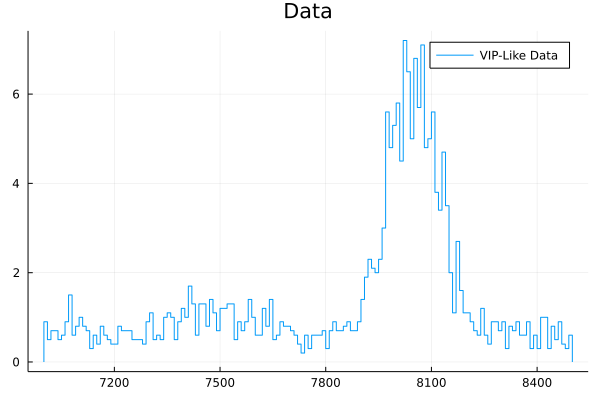

In [5]:
using Plots
plot(
    normalize(hist, mode=:density),
    st = :steps, label = "VIP-Like Data",
    title = "Data"
)
# savefig("tutorial-data.pdf")

This resembles a bit VIP data! Okay now let's go and analyse this.
Let's define our fit function - the function that we expect to describe the data histogram, at each x-Axis position x, depending on a given set p of model parameters

In [6]:
function fit_function(p::NamedTuple{(:a, :mu, :sigma, :intercept, :slope)}, x::Real)
    p.a[1] * pdf(Normal(p.mu[1], p.sigma[1]), x) +
    p.a[2] * pdf(Normal(p.mu[2], p.sigma[2]), x) +
    p.intercept + p.slope * x 
end

fit_function (generic function with 1 method)

Let's plot it together with the data

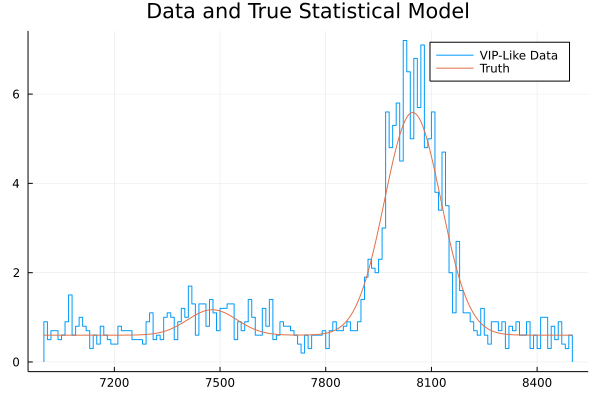

In [7]:
true_par_values = (a = [1000, 100], mu = (8047,7478), sigma = (80,70), intercept= 0.6, slope=0)
plot(
    normalize(hist, mode=:density),
    st = :steps, label = "VIP-Like Data",
    title = "Data and True Statistical Model"
)
plot!(
    7000:1:8500, x -> fit_function(true_par_values, x),
    label = "Truth"
)

# Bayesian Fit
now we will try to recover the true parameter used to generate the data usign BAT; there are three main steps:
1. We need to define a likelihood, that is going to be used 
2. We need priors for our Bayesia fit
3. We need to generate Monte Carlo Markov Chains to get the results

In [8]:
using BAT, IntervalSets, ValueShapes

## Likelihood
First, we need to define the likelihood (function) for our problem.

BAT represents densities like likelihoods and priors as subtypes of BAT.AbstractDensity. Custom likelihood can be defined by creating a new subtype of AbstractDensity and by implementing (at minimum) BAT.eval_logval_unchecked for that type - in complex uses cases, this may become necessary. Typically, however, it is sufficient to define a custom likelihood as a simple function that returns the log-likelihood value for a given set of parameters. BAT will automatically convert such a likelihood function into a subtype of AbstractDensity.

For performance reasons, functions should not access global variables directly. So we'll use an anonymous function inside of a let-statement to capture the value of the global variable hist in a local variable h (and to shorten function name fit_function to f, purely for convenience). The likelihood function wraps it's result in a LogDVal to indicate that it returns a log-likelihood value:

In [22]:

likelihood = let h = hist, f = fit_function
    params -> begin
        ## Histogram counts for each bin as an array:
        counts = h.weights

        ## Histogram binning, has length (length(counts) + 1):
        binning = h.edges[1]

        ## sum log-likelihood value over bins:
        ll_value::Float64 = 0.0
        for i in eachindex(counts)
            ## Get information about current bin:
            bin_left, bin_right = binning[i], binning[i+1]
            bin_width = bin_right - bin_left
            bin_center = (bin_right + bin_left) / 2

            observed_counts = counts[i]

            ## Simple mid-point rule integration of fit function `f` over bin:
            expected_counts = bin_width * f(params, bin_center)

            ## Add log of Poisson probability for bin:
            ll_value += logpdf(Poisson(expected_counts), observed_counts)
        end

        return LogDVal(ll_value)
    end
end


#15 (generic function with 1 method)

Now test the likelihood behaves somewhat as expected; if we explore the dependecy of the likelihood on a parameter e.g. the intercept, we should be able to see where the maximum log-likelihood is:

LogDVal{Float64}(-3189.1343003212273)
LogDVal{Float64}(-394.7504088102431)
LogDVal{Float64}(-4203.616500292256)


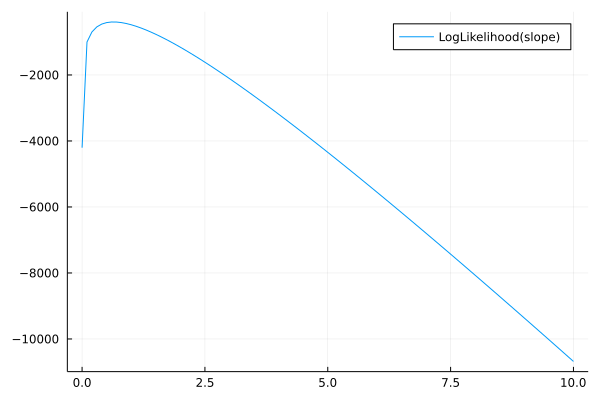

In [28]:
function makearg(intercept)
    p = ( a = [1000, 100], mu = (8047,7478), sigma = (80,70), intercept= intercept, slope=0)
    return p
end
# println( likelihood(makearg(4.) ) )
plot(0:0.1:10, x -> BAT.logvalof((likelihood(makearg(x)))), label = "LogLikelihood(slope)")

# Prior Definition
Now its time to define the priors; if you have absolutely no clue how a prior should be defined, then Uniform distribution will be fine. If you have pre-existing measurements telling you the distribution of a parameter, then you can incorporate that into the Priors.

Example, the position of the Copper and Nichel line is well known down to the eV. We will take a Gaussian distribution centered at 8046 eV with 2 eV of width

In [34]:
prior = NamedTupleDist(
      a = [Uniform(500.,1500),Uniform(50.,200)],
      mu= [Truncated(Normal(8047,2),7000,8500),Truncated(Normal(7478,2),7000,8500)],
      sigma=[Uniform(50,90),Uniform(50,90)],
      intercept=Uniform(0,2),
      slope=Uniform(0.0,0.5),
)

NamedTupleDist{(:a, :mu, :sigma, :intercept, :slope), Tuple{Product{Continuous, Uniform{Float64}, Vector{Uniform{Float64}}}, Product{Continuous, Truncated{Normal{Float64}, Continuous, Float64}, Vector{Truncated{Normal{Float64}, Continuous, Float64}}}, Product{Continuous, Uniform{Float64}, Vector{Uniform{Float64}}}, Uniform{Float64}, Uniform{Float64}}, Tuple{ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ScalarShape{Real}}, ValueAccessor{ScalarShape{Real}}}}(
_internal_distributions: (a = Product{Continuous, Uniform{Float64}, Vector{Uniform{Float64}}}(v=Uniform{Float64}[Uniform{Float64}(a=500.0, b=1500.0), Uniform{Float64}(a=50.0, b=200.0)]), mu = Product{Continuous, Truncated{Normal{Float64}, Continuous, Float64}, Vector{Truncated{Normal{Float64}, Continuous, Float64}}}(v=Truncated{Normal{Float64}, Continuous, Float64}[Truncated(Normal{Float64}(μ=8047.0, σ=2.0), range=(7000.0, 8500.0)), Truncated(Normal{Float64}

The prior also implies the shapes of the parameters:

In [35]:
parshapes = varshape(prior)

NamedTupleShape{(:a, :mu, :sigma, :intercept, :slope), Tuple{ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ScalarShape{Real}}, ValueAccessor{ScalarShape{Real}}}}((a = ValueAccessor{ArrayShape{Real, 1}}(ArrayShape{Real, 1}((2,)), 0, 2), mu = ValueAccessor{ArrayShape{Real, 1}}(ArrayShape{Real, 1}((2,)), 2, 2), sigma = ValueAccessor{ArrayShape{Real, 1}}(ArrayShape{Real, 1}((2,)), 4, 2), intercept = ValueAccessor{ScalarShape{Real}}(ScalarShape{Real}(), 6, 1), slope = ValueAccessor{ScalarShape{Real}}(ScalarShape{Real}(), 7, 1)), 8)

# Bayesian model definition
Given the likelihood and prior definition, a BAT.PosteriorDensity is simply defined via

In [36]:
posterior = PosteriorDensity(likelihood, prior)

PosteriorDensity{BAT.GenericDensity{var"#15#16"{Histogram{Int64, 1, Tuple{StepRange{Int64, Int64}}}, typeof(fit_function)}}, BAT.DistributionDensity{NamedTupleDist{(:a, :mu, :sigma, :intercept, :slope), Tuple{Product{Continuous, Uniform{Float64}, Vector{Uniform{Float64}}}, Product{Continuous, Truncated{Normal{Float64}, Continuous, Float64}, Vector{Truncated{Normal{Float64}, Continuous, Float64}}}, Product{Continuous, Uniform{Float64}, Vector{Uniform{Float64}}}, Uniform{Float64}, Uniform{Float64}}, Tuple{ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ScalarShape{Real}}, ValueAccessor{ScalarShape{Real}}}}, BAT.HyperRectBounds{Float64}}, BAT.HyperRectBounds{Float64}, NamedTupleShape{(:a, :mu, :sigma, :intercept, :slope), Tuple{ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ScalarShape{Real}}, ValueAccessor{ScalarShape{Real}}}}}(BAT.GenericDe

We can now use Markov chain Monte Carlo (MCMC) to explore the space of possible parameter values for the histogram fit.

To increase the verbosity level of BAT logging output, you may want to set the Julia logging level for BAT to debug via ENV["JULIA_DEBUG"] = "BAT".

Now we can generate a set of MCMC samples via bat_sample. We'll use 4 MCMC chains with 10^5 MC steps in each chain (after tuning/burn-in):

In [39]:
samples = bat_sample(posterior, MCMCSampling(mcalg = MetropolisHastings(), nsteps = 5*10^5, nchains = 4)).result

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64, 10}
└ @ BAT /root/.julia/packages/BAT/XvOy6/src/algotypes/bat_default.jl:44
┌ Info: Using transform algorithm PriorSubstitution()
└ @ BAT /root/.julia/packages/BAT/XvOy6/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /root/.julia/packages/BAT/XvOy6/src/samplers/mcmc/chain_pool_init.jl:56
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /root/.julia/packages/BAT/XvOy6/src/samplers/mcmc/chain_pool_init.jl:173
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /root/.julia/packages/BAT/XvOy6/src/samplers/mcmc/multi_cycle_burnin.jl:35
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /root/.julia/packages/BAT/XvOy6/src/samplers/mcmc/multi_cycle_burnin.jl:65
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 4 converged.
└ @ BAT /root/.julia/packages/BAT/XvOy6/src/samplers/mcmc/multi_cycle_burnin.jl:65
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 4

359973-element StructArray(::ShapedAsNTArray{NamedTuple{(:a, :mu, :sigma, :intercept, :slope), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}, Float64, Float64}}, 1, ArraysOfArrays.ArrayOfSimilarArrays{Float64, 1, 1, 2, ElasticArrays.ElasticMatrix{Float64, Vector{Float64}}}, NamedTupleShape{(:a, :mu, :sigma, :intercept, :slope), Tuple{ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ArrayShape{Real, 1}}, ValueAccessor{ScalarShape{Real}}, ValueAccessor{ScalarShape{Real}}}}}, ::Vector{Float64}, ::Vector{Int64}, StructArray(::Vector{Int32}, ::Vector{Int32}, ::Vector{Int64}, ::Vector{Int64}), ::Vector{Nothing}) with eltype DensitySample{NamedTuple{(:a, :mu, :sigma, :intercept, :slope), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}, Float64, Float64}}, Float64, Int64, BAT.MCMCSampleID, Nothing}:
 DensitySample{NamedTuple{(:a, :mu, :sigma, :intercept, :slope), Tuple{ElasticArrays.ElasticVector{Float64, Vector{Float64}}, ElasticArrays.El

Show mode mean and standard deviation of the samples


In [40]:
println("Truth: $true_par_values")
println("Mode: $(mode(samples))")
println("Mean: $(mean(samples))")
println("Stddev: $(std(samples))")

Truth: (a = [1000, 100], mu = (8047, 7478), sigma = (80, 70), intercept = 0.6, slope = 0)
Mode: ShapedAsNT((a = [1019.6276497505213, 119.2013952593505], mu = [8047.468717433224, 7478.10925864239], sigma = [70.21595589501304, 89.89675036333963], intercept = 0.6357825555557289, slope = 1.5791077296401723e-6))
Mean: ShapedAsNT((a = [1014.4397573994752, 114.47004981617977], mu = [8047.680555336814, 7477.963054312532], sigma = [69.60635049558307, 80.5128947964931], intercept = 0.42744833833469653, slope = 2.875043902272674e-5))
Stddev: ShapedAsNT((a = [38.038140688654636, 21.34518711962936], mu = [1.6017685797039813, 1.9780421712334617], sigma = [2.380076988937006, 7.490240100846763], intercept = 0.16275261365023724, slope = 2.101186335724596e-5))


# Look at marginalized distributions
BAT.jl comes with an extensive set of plotting recipes for "Plots.jl". We can plot the marginalized distribution for a single parameter (e.g. parameter 3, i.e. μ[1]):

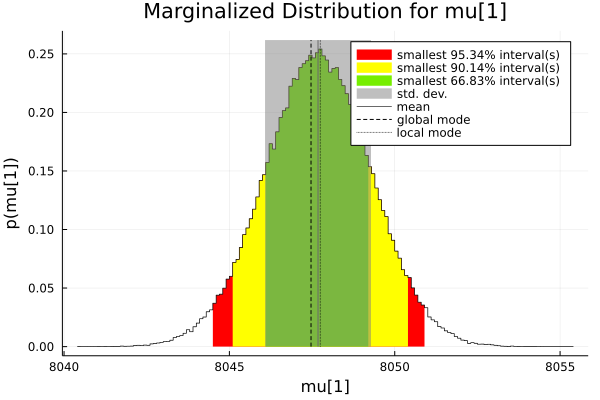

In [44]:
plot(
    samples, :(mu[1]),
    mean = true, std = true, globalmode = true, marginalmode = true, intervals=[0.66,0.9, 0.95],
    nbins = 200, title = "Marginalized Distribution for mu[1]"
)

Or more

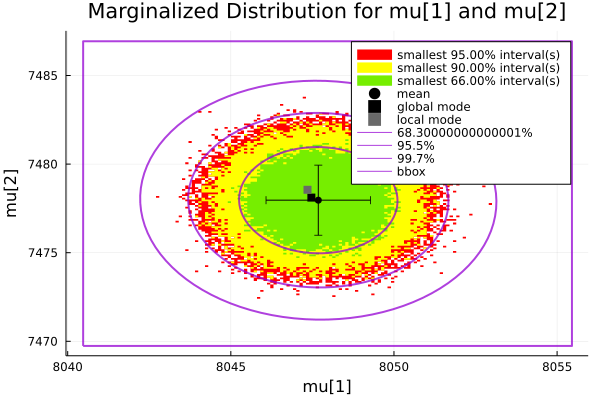

In [46]:
plot(
    samples, (:(mu[1]), :(mu[2])),
    mean = true, std = true, globalmode = true, marginalmode = true, intervals=[0.66,0.9, 0.95],
    nbins = 200, title = "Marginalized Distribution for mu[1] and mu[2]"
)
plot!(BAT.MCMCBasicStats(samples), (3, 4))

All together

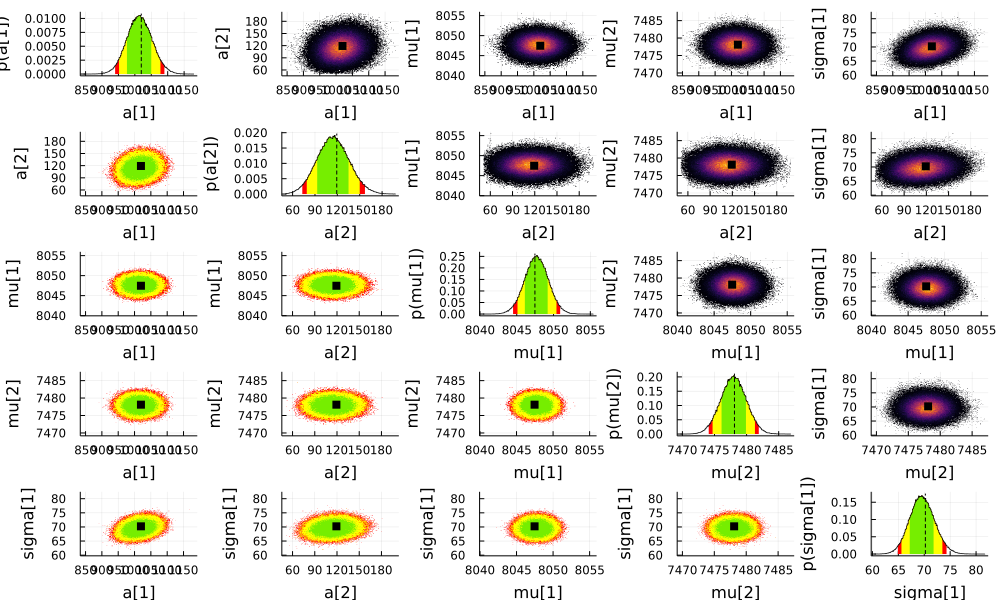

In [47]:
plot(
    samples,
    mean = false, std = false, globalmode = true, marginalmode = false,intervals=[0.66,0.9, 0.95],
    nbins = 200
)

Let's look at the function with the best parameters as determined by the Bayesia fit. 

(a = [1000, 100], mu = (8047, 7478), sigma = (80, 70), intercept = 0.6, slope = 0)
(a = [1019.6276497505213, 119.2013952593505], mu = (8047.468717433224, 7478.10925864239), sigma = (70.21595589501304, 89.89675036333963), intercept = 0.6357825555557289, slope = 1.5791077296401723e-6)


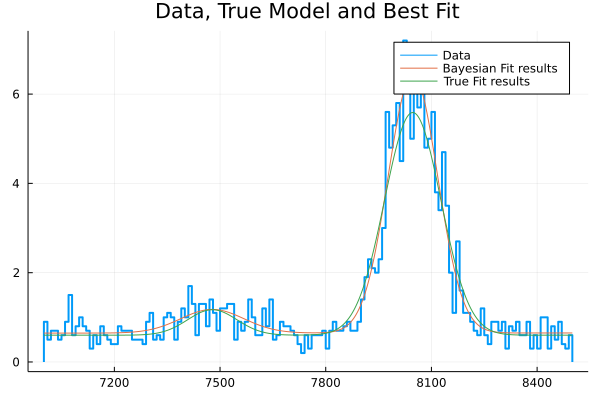

In [73]:
samples_mode[] isa NamedTuple

unshaped(samples_mode)
 
mode_params = (a = [samples_mode.a[1],samples_mode.a[2]], mu = (samples_mode.mu[1],samples_mode.mu[2]),sigma = (samples_mode.sigma[1],samples_mode.sigma[2]),intercept=samples_mode.intercept[1],slope=samples_mode.slope[1])
plot(
    normalize(hist, mode=:density),
    color=1, linewidth=2, fillalpha=0.0,
    st = :steps, fill=false, label = "Data",
    title = "Data, True Model and Best Fit"
)
println(true_par_values)
println(mode_params)

plot!(7000.:1.:8500., x -> fit_function(mode_params,x), label = "Bayesian Fit results")
plot!(7000.:1.:8500., x -> fit_function(true_par_values,x), label = "True parameters")

As you can see since the data is rather poor in statistics the mean of marginalized posterior distribution is not super accurate, for example in the sigma of the distributions.

However the picture changes if we look at all the information of the posterior distibution, e.g. the smallest intervals

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64, 10}
└ @ BAT /root/.julia/packages/BAT/XvOy6/src/algotypes/bat_default.jl:44


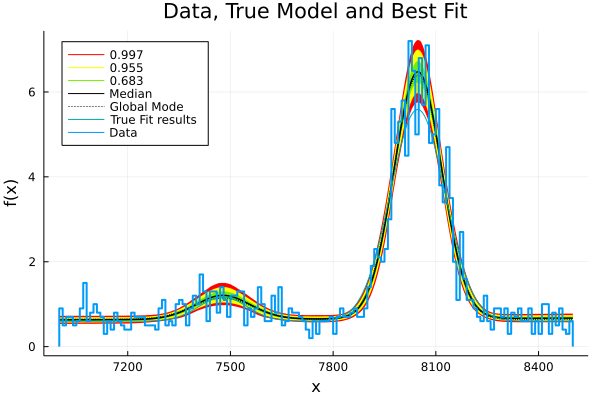

In [77]:
plot(7000.:1.:8500., fit_function, samples)
plot!(7000.:1.:8500., x -> fit_function(true_par_values,x), label = "True Fit results")
plot!(
    normalize(hist, mode=:density),
    color=1, linewidth=2, fillalpha=0.0,
    st = :steps, fill=false, label = "Data",
    title = "Data, True Model and Best Fit"
)


Let's look at the marginalized posterior distribution for the slope; we know we have generated data with slope=0!

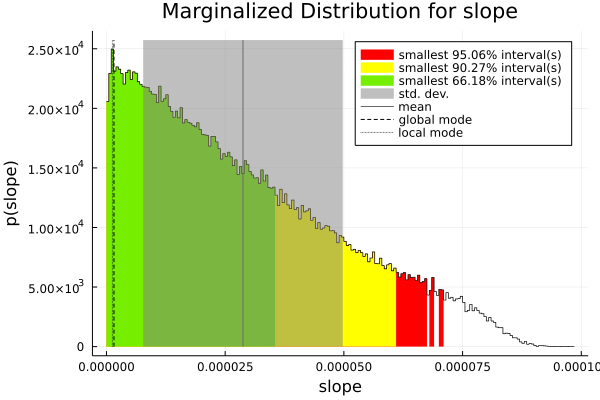

In [92]:
plot(
    samples, :(slope),
    mean = true, std = true, globalmode = true, marginalmode = true, intervals=[0.66,0.9, 0.95],
    nbins = 200, title = "Marginalized Distribution for slope"
)

Be careful: mode and mean are very different here!
Let's extract the point of 90% interval for slope:

In [78]:
samplesu = unshaped.(samples)

359973-element StructArray(::ArraysOfArrays.ArrayOfSimilarArrays{Float64, 1, 1, 2, ElasticArrays.ElasticMatrix{Float64, Vector{Float64}}}, ::Vector{Float64}, ::Vector{Int64}, StructArray(::Vector{Int32}, ::Vector{Int32}, ::Vector{Int64}, ::Vector{Int64}), ::Vector{Nothing}) with eltype DensitySample{Vector{Float64}, Float64, Int64, BAT.MCMCSampleID, Nothing}:
 DensitySample{SubArray{Float64, 1, ElasticArrays.ElasticMatrix{Float64, Vector{Float64}}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}, Float64, Int64, BAT.MCMCSampleID, Nothing}([1038.451863180555, 123.25754370367864, 8047.704312748741, 7475.293048102288, 66.80951572515606, 79.85592269066842, 0.011920713049789006, 8.430097778511414e-5], -409.81237259470913, 3, BAT.MCMCSampleID(20, 7, 0, 1), nothing)
 DensitySample{SubArray{Float64, 1, ElasticArrays.ElasticMatrix{Float64, Vector{Float64}}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}, Float64, Int64, BAT.MCMCSampleID, Nothing}([1046.0985046691928, 122.46876102340661, 

In [80]:
# This extract the slope and its error
using ArraysOfArrays

arrayofsbar=[]
arrayofrelativeerror=[]
# length(samples)
precedentsbar=0
stepcheck = 1000
for smax = 1:stepcheck:length(samples)
    samplesureduced = samplesu[1:smax]    
    hist2 = fit(Histogram, flatview(samplesureduced.v)[8, :], FrequencyWeights(samplesureduced.weight), nbins = 1500, closed = :left) 

#     plot(normalize(hist2,mode=:pdf))
#     plot!(samples,2, alpha=0.2)

    edges_sig = hist2.edges
    weights_sig = hist2.weights
    # println(weights_sig)
    integral_tot = 0
    for i in weights_sig
        integral_tot += i
    end
    # println(integral_tot)

    iter = 0 
    integral_part = 0
    for i in weights_sig
        integral_part += i
        iter += 1
        if integral_part > integral_tot *0.90
            break
        end
    end
    stepsize = collect(edges_sig[1])[2]-collect(edges_sig[1])[1] 
    
    push!(arrayofrelativeerror,(iter*stepsize-precedentsbar)/(iter*stepsize))
    
    precedentsbar=iter*stepsize
    # println(stepsize)
    # println(iter*stepsize)
    push!(arrayofsbar,iter*stepsize)
end

You can see now the precision of the 90% point as the number of iteration fo the MCMC increases:

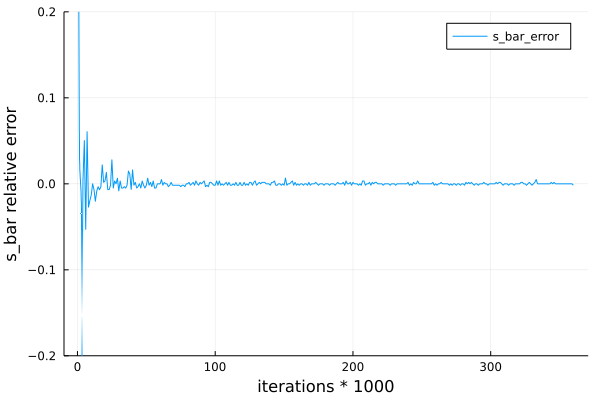

In [81]:
plot(arrayofrelativeerror,label = "s_bar_error",xlabel="iterations * $stepcheck",ylabel="s_bar relative error",ylim=(-0.2,0.2))

And finally we are here:

360
6.0599999999999996e-5


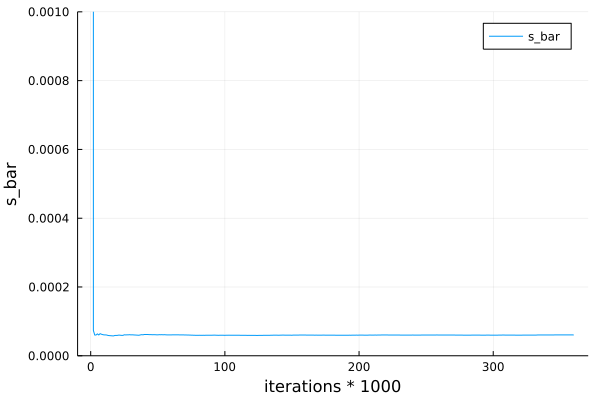

In [91]:
# output the S_bar
println(length(arrayofsbar))
println(arrayofsbar[360])
plot(arrayofsbar,label = "s_bar",xlabel="iterations * $stepcheck",ylabel="s_bar", ylim=(0,1e-3))



# Hands-on
Let's make a more realist case, including the PEP violating line. You can continue down below on this notebook or open a new one. What's needed here

1. The data we generated can stay the same
2. In the function, add another line, at 7746.73 eV and with the same width as the Cu line.
3. The likelihood as it is written is very general ( be careful with naming though) and can stay the same.
4. Need to add three extra terms in the priors, maintain the order of the parameters as they are specified in the function. You can use as prior for the yield an uniform distribution between 0 and 2700 (2700 comes from VIP1!).
5. Now you need to run the rest. If MCMC does not converge, try run with more iterations.




# Conclusions
Now you have at hand all you need to run a Bayesian analysis for the VIP-2 experiment. The analysis is a bit more sophisticathed, but the principle is the same as shown here.

# Getting root files on Julia
If you need to import root files, this can be done in two ways: from txt files or with root package reader

## From txt files
If you have a saved TH1F, you can print to a txt 
```
bin_edge_left  bin_edge_right  bin_content
```
e.g.
```
 7000.0  7010.0  135.0
 7010.0  7020.0  143.0
 7020.0  7030.0  127.0
 7030.0  7040.0  151.0
 7040.0  7050.0  137.0
 7050.0  7060.0  129.0
 7060.0  7070.0  133.0
 7070.0  7080.0  137.0
 7080.0  7090.0  125.0
 7090.0  7100.0  131.0
 7100.0  7110.0  127.0
 7110.0  7120.0  127.0
 7120.0  7130.0  132.0
 ⋮
 ```

 Then you can read it with
 ```
using DelimitedFiles
reader= readdlm("myfile.txt", '\t', Float64, '\n')

```
Be careful with delimiter and termination string.

Then get the histogram like this:
```

using StatsBase, LinearAlgebra
using Plots


bins = reader[:,1];
obs = reader[:,3]

histwoc = fit(Histogram, bins, weights(obs), 7000:10:8500)

```

## Using Root package

In [94]:
import Pkg; Pkg.add("UnROOT")
using UnROOT

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed Crayons ──────────── v4.0.4
   Installed CodecZlib ────────── v0.7.0
   Installed Lz4_jll ──────────── v1.9.3+0
   Installed Mixers ───────────── v0.1.1
   Installed PooledArrays ─────── v1.3.0
   Installed Memoization ──────── v0.1.13
   Installed CodecLz4 ─────────── v0.4.0
   Installed LorentzVectors ───── v0.4.0
   Installed CodecZstd ────────── v0.7.0
   Installed AbstractTrees ────── v0.3.4
   Installed LRUCache ─────────── v1.3.0
   Installed XZ_jll ───────────── v5.2.5+2
   Installed TranscodingStreams ─ v0.9.6
   Installed DataFrames ───────── v1.2.2
   Installed CodecXz ──────────── v0.7.0
   Installed UnROOT ───────────── v0.5.0
   Installed PrettyTables ─────── v1.1.0
    Updating `~/.julia/environments/v1.6/Project.toml`
  [3cd96dde] + UnROOT v0.5.0
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [1520ce14] + AbstractTrees v0.3.4
  [5ba52731] + CodecLz4 v0.4.0
  [

In [98]:
f = ROOTFile("period123456_nocurrent_no15_summed.root")

ROOTFile with 1 entry and 14 streamers.
period123456_nocurrent_no15_summed.root


(0.0:10.0:40000.0,)
(4001,)


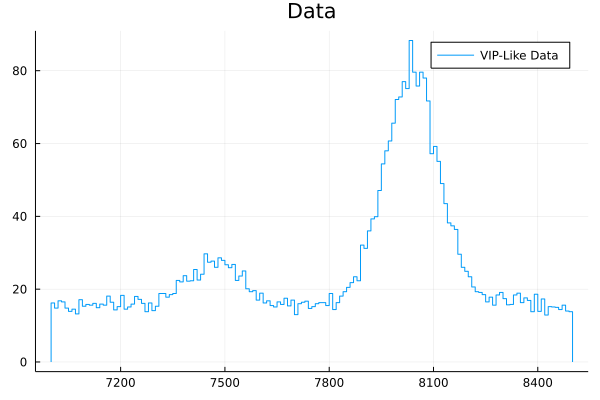

In [153]:
keys(f)
counts, edges, sumw2 = UnROOT.parseTH(f["histox1"])
# need to be careful: in ROOT e.g. a histogram with 2 bins has 3 edges. In Julia only 2.
println(edges)
append!(counts,0.)
println(size(counts))
histwoc = fit(Histogram, edges[1], weights(counts), 7000:10:8500)


plot(
    normalize(histwoc, mode=:density),
    st = :steps, label = "VIP-Like Data",
    title = "Data"
)